In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
max=df["total_rooms"].max()
min=df["total_rooms"].min()
print(f"Max number of numbers: {max}")
print(f"Min number of numbers: {min}")

Max number of numbers: 39320.0
Min number of numbers: 2.0


In [5]:
df["sklierte"]=df["total_rooms"].apply(lambda x: (x-min)/(max-min))

In [6]:
df["sklierte"]=df["total_rooms"].apply(lambda x: (1+(9*(x-min)/(max-min))))

In [7]:
df["sklierte"].max()

10.0

##### How to do scaling unsing sklearn:

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
df["scaled"]=scaler.fit_transform(df[["total_rooms"]])

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,sklierte,scaled
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.200977,0.022331
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.624523,0.180503
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.335343,0.037260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.291164,0.032352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.371967,0.041330
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.380665,0.042296
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.159087,0.017676
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.515489,0.057277
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.425301,0.047256


<Axes: >

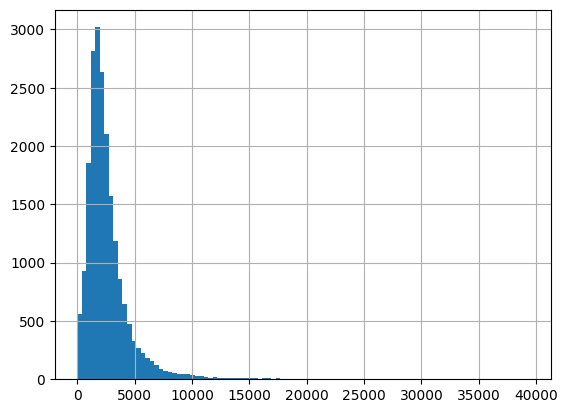

In [12]:
df.total_rooms.hist(bins=100)

<Axes: >

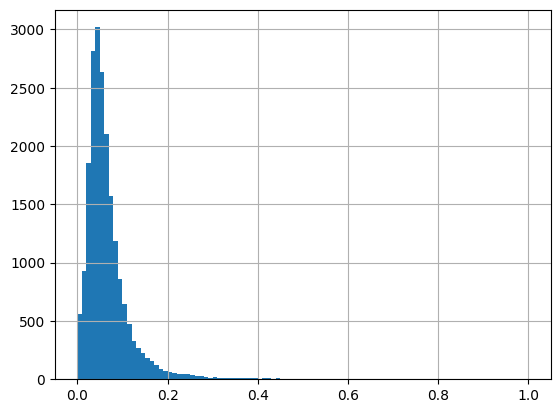

In [13]:
df.scaled.hist(bins=100)

In [14]:
new_scaler=MinMaxScaler(feature_range=(1,10))
df["new_scaler"]=new_scaler.fit_transform(df[["total_rooms"]])

In [15]:
df["new_scaler"].describe()

count    20640.000000
mean         1.602876
std          0.499378
min          1.000000
25%          1.330936
50%          1.486418
75%          1.720128
max         10.000000
Name: new_scaler, dtype: float64

#### Z-Score Skalierung:

In [16]:
from sklearn.preprocessing import StandardScaler

In [25]:
print(f"The mean before doing standard scaling: \
{df["housing_median_age"].mean()}")

print(f"The standard deviation before doing standard scaling: \
{df["housing_median_age"].std()}")

The mean before doing standard scaling: 28.639486434108527
The standard deviation before doing standard scaling: 12.58555761211165


In [27]:
scaler=StandardScaler()
df["housing_median_age_scaled"]=scaler.fit_transform(df[["housing_median_age"]])

In [29]:
print(f"The mean after doing standard scaling: \
{df["housing_median_age_scaled"].mean()}")

print(f"The standard deviation after doing standard scaling: \
{df["housing_median_age_scaled"].std()}")

The mean after doing standard scaling: 5.508083222946513e-18
The standard deviation after doing standard scaling: 1.0000242256864988


<Axes: >

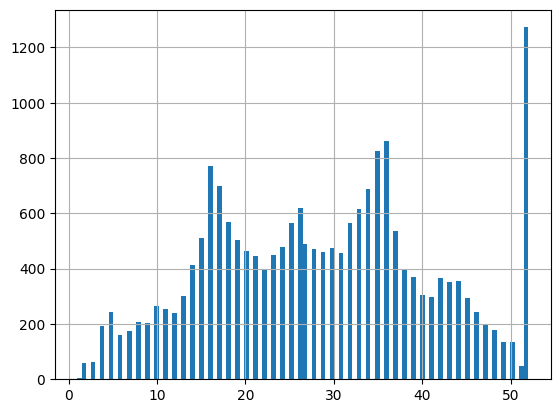

In [31]:
df["housing_median_age"].hist(bins=100)

<Axes: >

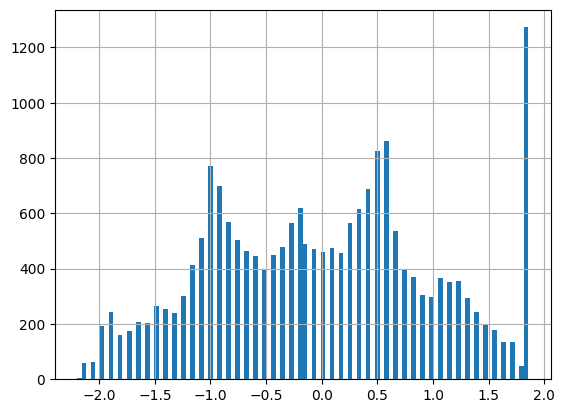

In [32]:
df["housing_median_age_scaled"].hist(bins=100)

#### **Normalisieren:**

In [33]:
import pandas as pd
from sklearn.preprocessing import normalize

# Beispiel-Daten
data = {
    'Feature1': [1, 2, 3],
    'Feature2': [4, 5, 6],
    'Feature3': [7, 8, 9]
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1,4,7
1,2,5,8
2,3,6,9


In [42]:
df_normalized=normalize(df,axis=1)
df=pd.DataFrame(df_normalized,columns=df.columns)
df

,Feature1,Feature2,Feature3
0,0.123091,0.492366,0.861640
1,0.207390,0.518476,0.829561
2,0.267261,0.534522,0.801784


#### How to calculate the norm of a vector using numpy?

In [35]:
import numpy as np
# Beispielvektor
vektor = np.array([0.123091,0.492366,0.861640])
# Berechnung der L2-Norm des Vektors
norm = np.linalg.norm(vektor)
print("Die Norm des Vektors ist:", norm)

Die Norm des Vektors ist: 0.9999995809184121


#### **Log Transformation:**

In [14]:
import json
import pandas as pd
import numpy as np

In [8]:
data_file = open('yelp_academic_dataset_business.json',encoding="utf-8")
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)
data_file.close()

In [10]:
review_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


<Axes: >

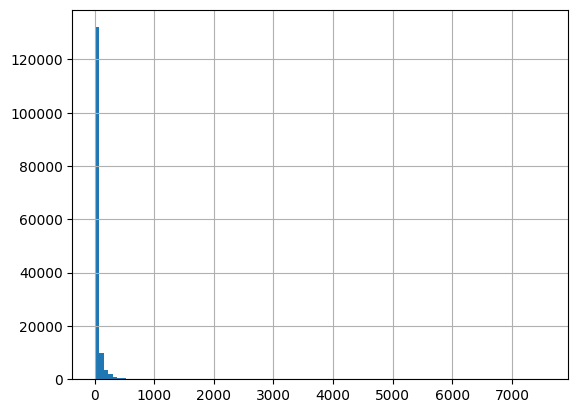

In [13]:
review_df["review_count"].hist(bins=100)

In [15]:
review_df["review_count_logarithmiert"]=np.log10(review_df["review_count"])

<Axes: >

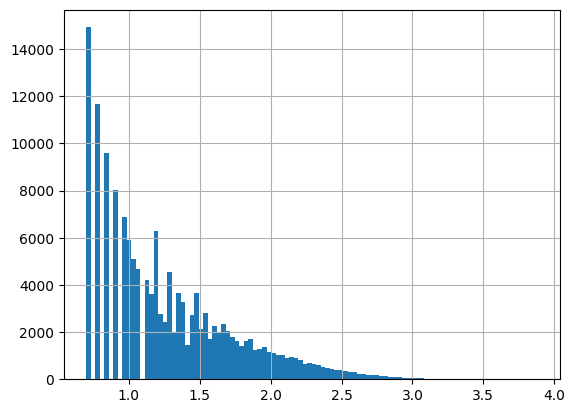

In [16]:
review_df["review_count_logarithmiert"].hist(bins=100)

In [25]:
df=pd.read_csv(r"OnlineNewsPopularity\OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<Axes: >

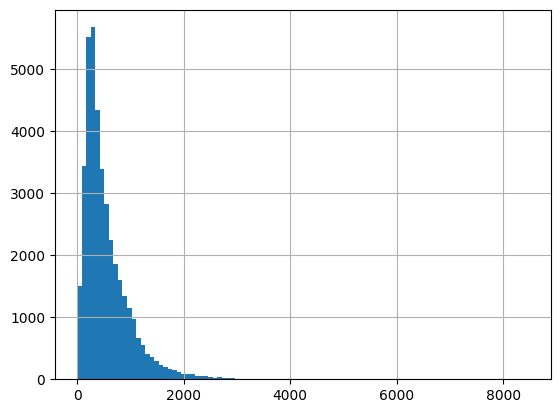

In [22]:
df[" n_tokens_content"].hist(bins=100)

In [28]:
df[" n_tokens_content_log"]=np.log10(df[" n_tokens_content"]+1)

<Axes: >

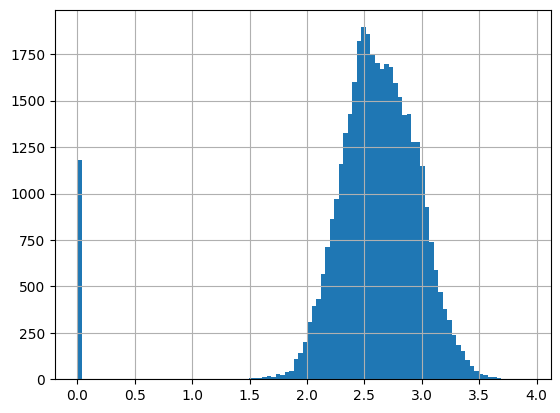

In [29]:
df[" n_tokens_content_log"].hist(bins=100)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [35]:
review_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_count_logarithmiert'],
      dtype='object')

In [39]:
m_org=LinearRegression()
scores_orig=cross_val_score(m_org, review_df[["review_count"]],review_df["stars"],cv=10)
scores_orig.mean()


0.003535168094958019

In [44]:
review_df["review_count_log"]=np.log10(review_df["review_count"])

In [45]:
m_org=LinearRegression()
scores_orig=cross_val_score(m_org, review_df[["review_count_log"]],review_df["stars"],cv=10)
scores_orig.mean()

0.002411147035375272

#### **Box-Cox-Normalization:** 

In [46]:
import pandas as pd 
from scipy.stats import boxcox

In [47]:
df=pd.read_csv("housing.csv")

<Axes: >

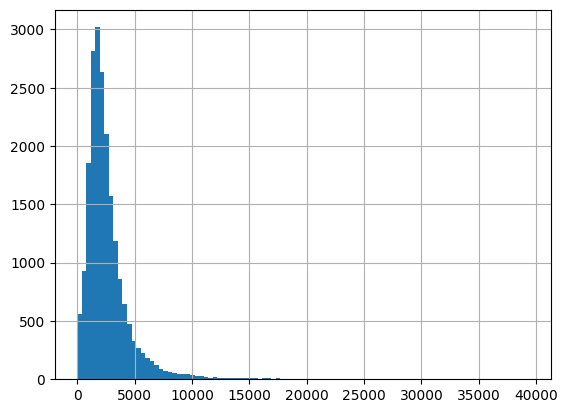

In [48]:
df["total_rooms"].hist(bins=100)

In [49]:
df_transformed, lamda=boxcox(df["total_rooms"])

In [50]:
lamda

0.2207829522748641

In [52]:
df_transformed=pd.Series(df_transformed)

<Axes: >

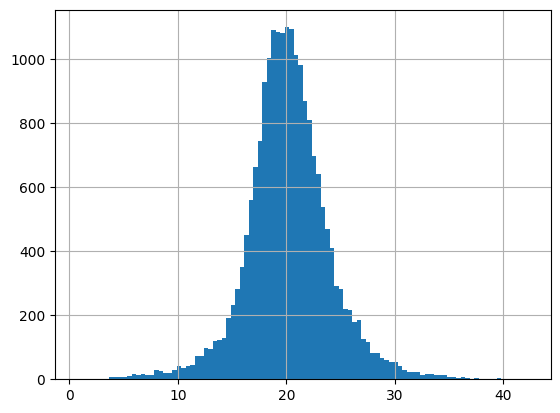

In [53]:
df_transformed.hist(bins=100)

42.2923239016895